## Day 4, Part A: Hyperparameter Tuning

## Learning goals
- Find out how tau and other hyperparameters affect learning
- Gain insight into how to adjust hyperparameters when training and RL model

## Definitions
- **Simulation environment**: Notice that this is not the same as the python/conda environment.  The simulation environment is the simulated world where the reinforcement learning takes place.  It provides opportunities for an agent to learn and explore, and ideally provides challenges that aid in efficient learning.
- **Agent (aka actor or policy)**: An entity in the simulation environment that performs actions.  The agent could be a person, a robot, a car, a thermostat, etc.
- **State variable**: An observed variable in the simulation environment.  They can be coordinates of objects or entities, an amount of fuel in a tank, air temperature, wind speed, etc.
- **Action variable**: An action that the agent can perform.  Examples: step forward, increase velocity to 552.5 knots, push object left with force of 212.3 N, etc.
- **Reward**: A value given to the agent for doing something considered to be 'good'.  Reward is commonly assigned at each time step and cumulated during a learning episode.
- **Episode**: A learning event consisting of multiple steps in which the agent can explore.  It starts with the unmodified environment and continues until the goal is achieved or something prevents further progress, such as a robot getting stuck in a hole.  Multiple episodes are typically run in loops until the model is fully trained.
- **Model (aka policy or agent)**: An RL model is composed of the modeling architecture (e.g., neural network) and parameters or weights that define the unique behavior of the model.
- **Policy (aka model or agent)**: The parameters of a model that encode the best choices to make in an environment.  The choices are not necessarily good ones until the model undergoes training.  The policy (or model) is the "brain" of the agent.
- **Replay Buffer**: A place in memory to store state, action, reward and other variables describing environmental state transitions. It is effectively the agent's memory of past experiences.
- **On-policy**: The value of the next action is determined using the current actor policy.
- **Off-policy**: The value of the next action is determined by a function, such as a value function, instead of the current actor policy.
- **Value function**: Function (typically a neural network) used to estimate the value, or expected reward, of an action.
- **Hyperparameter**: Parameters _chosen_ by the modeler to control machine learning.  Other parameters, like those that define the policy, are _generated_ by machine learning.

### Hyperparameter Tuning

Here are the hyperparameters from a previous TD3 model:

```python
"policy" : "TD3",                  # Policy name (TD3, DDPG or OurDDPG)
"env" : "MyAntBulletEnv-v0",       # OpenAI gym environment name
"seed" : 0,                        # Sets Gym, PyTorch and Numpy seeds
"start_timesteps" : 25e3,          # Time steps initial random policy is used
"eval_freq" : 5e3,                 # How often (time steps) we evaluate
"max_timesteps" : 5e6,             # Max time steps to run environment
"expl_noise" : 0.1,                # Std of Gaussian exploration noise
"batch_size" : 256,                # Batch size for both actor and critic
"discount" : 0.99,                 # Discount factor
"tau" : 0.007,                     # Target network update rate
"policy_noise" : 0.2,              # Noise added to target policy during critic update
"noise_clip" : 0.5,                # Range to clip target policy noise
"policy_freq" : 2,                 # Frequency of delayed policy updates
"save_model" : "store_true",       # Save model and optimizer parameters
"load_model" : "",                 # Model load file name, "" doesn't load, "default" uses file_name
```

**TODO: add legends to the plots showing the actual values of tau used.  Average the results of each batch of 3-5 runs.  Do the same with other hyperparameters, like batch_size, policy_noise, etc.**

Below are results from several modeling runs in which the only difference between runs is a hyperparameter: tau.  Tau is the rate at which the target network is updated - each color in the image represents a different value for tau, and each value is run 3-5 times, with different seeds.

In all cases, you'll eventually get the answer - they all saturate at about the same reward. But in some cases, we would be 'done' before 400k time-steps, and some take nearly double that.

This should illustrate two things - first, the training path is not deterministic across random seeds (the spread between paths in a single color) - and second, if you know your system and the parameters that go into the training, small changes can have big impacts on resources down the road.

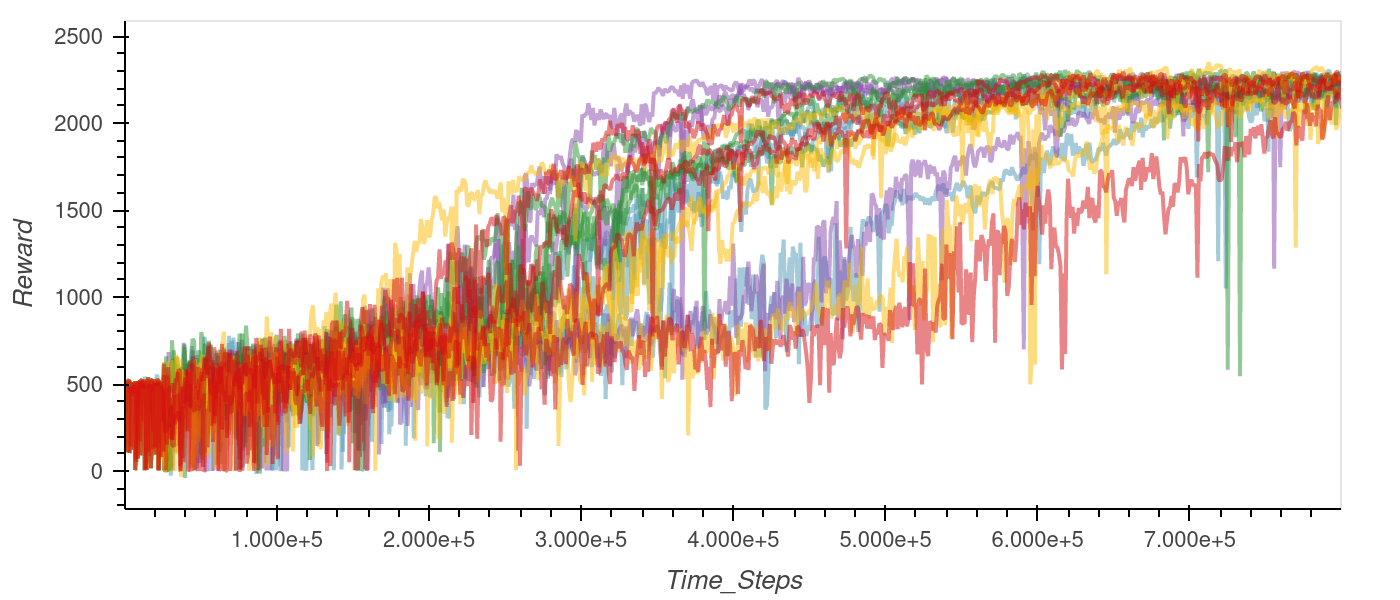

In [1]:
import IPython.display as ipd
ipd.Image("images/modifying_tau.png")

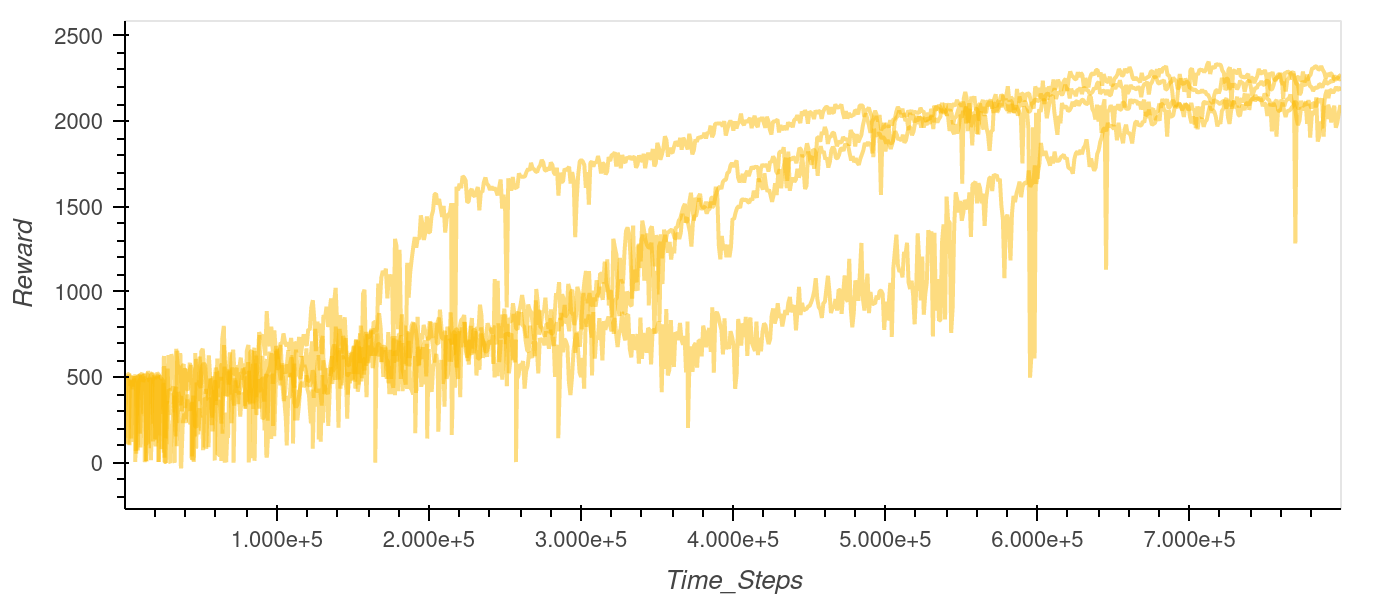

In [2]:
ipd.Image("images/tau_005.png")

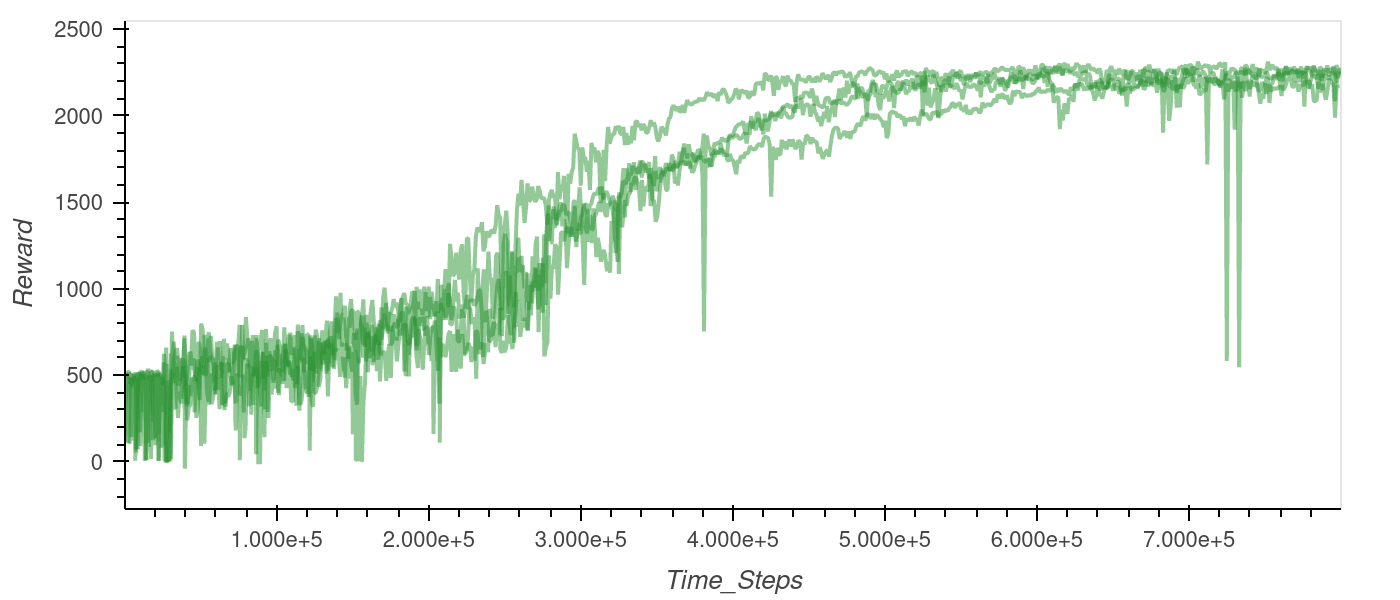

In [3]:
ipd.Image("images/tau_007.png")